**Importing Libraries**

In [217]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

*Giving file paths for datasets*

In [218]:
train_data = '/home/gautam/Desktop/Pneumonia_Identification/dataset/train'
test_data = '/home/gautam/Desktop/Pneumonia_Identification/dataset/test'
val_data = '/home/gautam/Desktop/Pneumonia_Identification/dataset/val'

batch_size = 16

img_height = 500
img_width = 500

*Data Augmentation*

In [219]:
image_gen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1/255)

*Loading the Images*

In [220]:
train = image_gen.flow_from_directory(train_data, target_size=(img_height, img_width), color_mode="grayscale", class_mode='binary', batch_size=batch_size)
test = test_data_gen.flow_from_directory(test_data, shuffle=False, target_size=(img_height, img_width), color_mode="grayscale", class_mode='binary', batch_size=batch_size)
valid = image_gen.flow_from_directory(val_data, target_size=(img_height, img_width), color_mode="grayscale", class_mode='binary', batch_size=batch_size)

Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


*Visualising the Data*

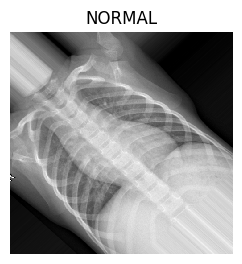

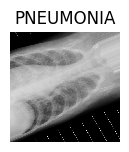

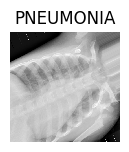

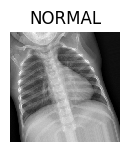

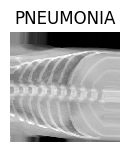

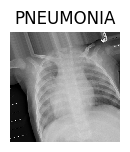

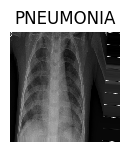

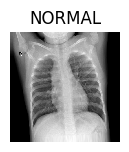

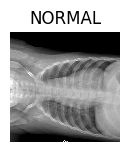

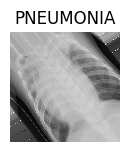

In [221]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')
        break
    plt.tight_layout()
    plt.show()

*CNN Architecture*

In [222]:
cnn = Sequential()


cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 249, 249, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_134 (Conv2D)         (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 123, 123, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 60, 60, 32)     

*Interpreting Model Summary*

In [223]:
Conv2D(filters=128, kernel_size=(3, 3),activation='relu', input_shape=(500, 500, 1))

MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

*Visualize CNN model*

In [224]:
plot_model(cnn, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


*Fitting the model*

In [225]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

*Assigning Class Weights*

In [226]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.9371534195933457, 1: 0.6739549839228296}


*Fitting the model*

In [227]:
cnn.fit(train, epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25


2023-04-26 22:02:49.349949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


262/262 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.7889

2023-04-26 22:03:25.990129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


262/262 [==============================] - 45s 169ms/step - loss: 0.4651 - accuracy: 0.7889 - val_loss: 0.5752 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 2/25
262/262 [==============================] - 45s 173ms/step - loss: 0.3574 - accuracy: 0.8473 - val_loss: 0.3371 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 3/25
262/262 [==============================] - 45s 171ms/step - loss: 0.3222 - accuracy: 0.8564 - val_loss: 0.3299 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 4/25
262/262 [==============================] - 44s 170ms/step - loss: 0.2933 - accuracy: 0.8719 - val_loss: 0.2471 - val_accuracy: 0.9173 - lr: 0.0010
Epoch 5/25
262/262 [==============================] - 44s 170ms/step - loss: 0.2595 - accuracy: 0.8884 - val_loss: 0.2267 - val_accuracy: 0.9221 - lr: 0.0010
Epoch 6/25
262/262 [==============================] - 45s 170ms/step - loss: 0.2447 - accuracy: 0.9005 - val_loss: 0.2407 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 7/25
262/262 [==============================] - ETA: 0s -

*Evaluating the model*

<Axes: >

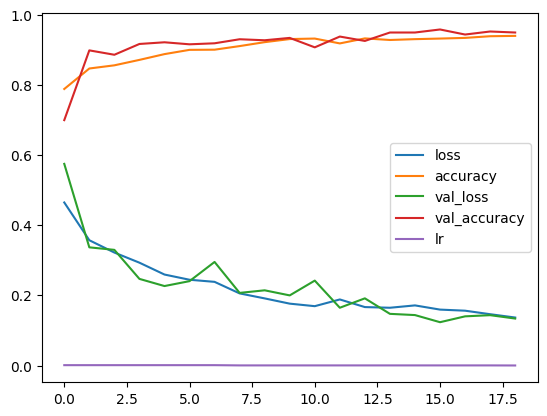

In [228]:
pd.DataFrame(cnn.history.history).plot()

In [229]:
test_acc = cnn.evaluate(test)
print('Test Accuracy: ', test_acc[1]*100, '%')

 1/39 [..............................] - ETA: 4s - loss: 0.1804 - accuracy: 0.9375

2023-04-26 22:16:50.337758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 2s 41ms/step - loss: 0.3589 - accuracy: 0.8526
Test Accuracy:  85.25640964508057 %


In [230]:
preds= cnn.predict(test, verbose=1)

 1/39 [..............................] - ETA: 5s

2023-04-26 22:16:52.146052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 2s 40ms/step


In [231]:
predictions = preds.copy()
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

<Axes: >

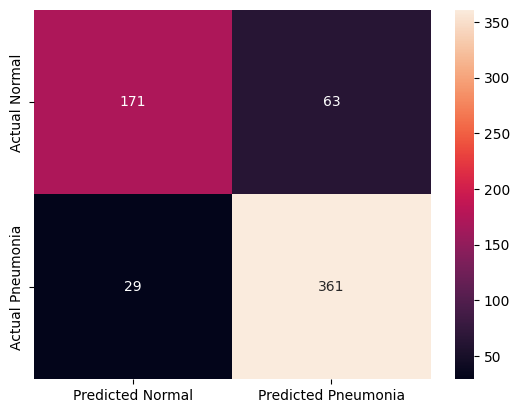

In [232]:
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]), index=['Actual Normal', 'Actual Pneumonia'], columns=['Predicted Normal', 'Predicted Pneumonia'])

sns.heatmap(cm, annot=True, fmt='d')

In [233]:
print(classification_report(y_true=test.classes, y_pred=predictions, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.85      0.73      0.79       234
   Pneumonia       0.85      0.93      0.89       390

    accuracy                           0.85       624
   macro avg       0.85      0.83      0.84       624
weighted avg       0.85      0.85      0.85       624



In [234]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

(624, 500, 500, 1)
(624,)


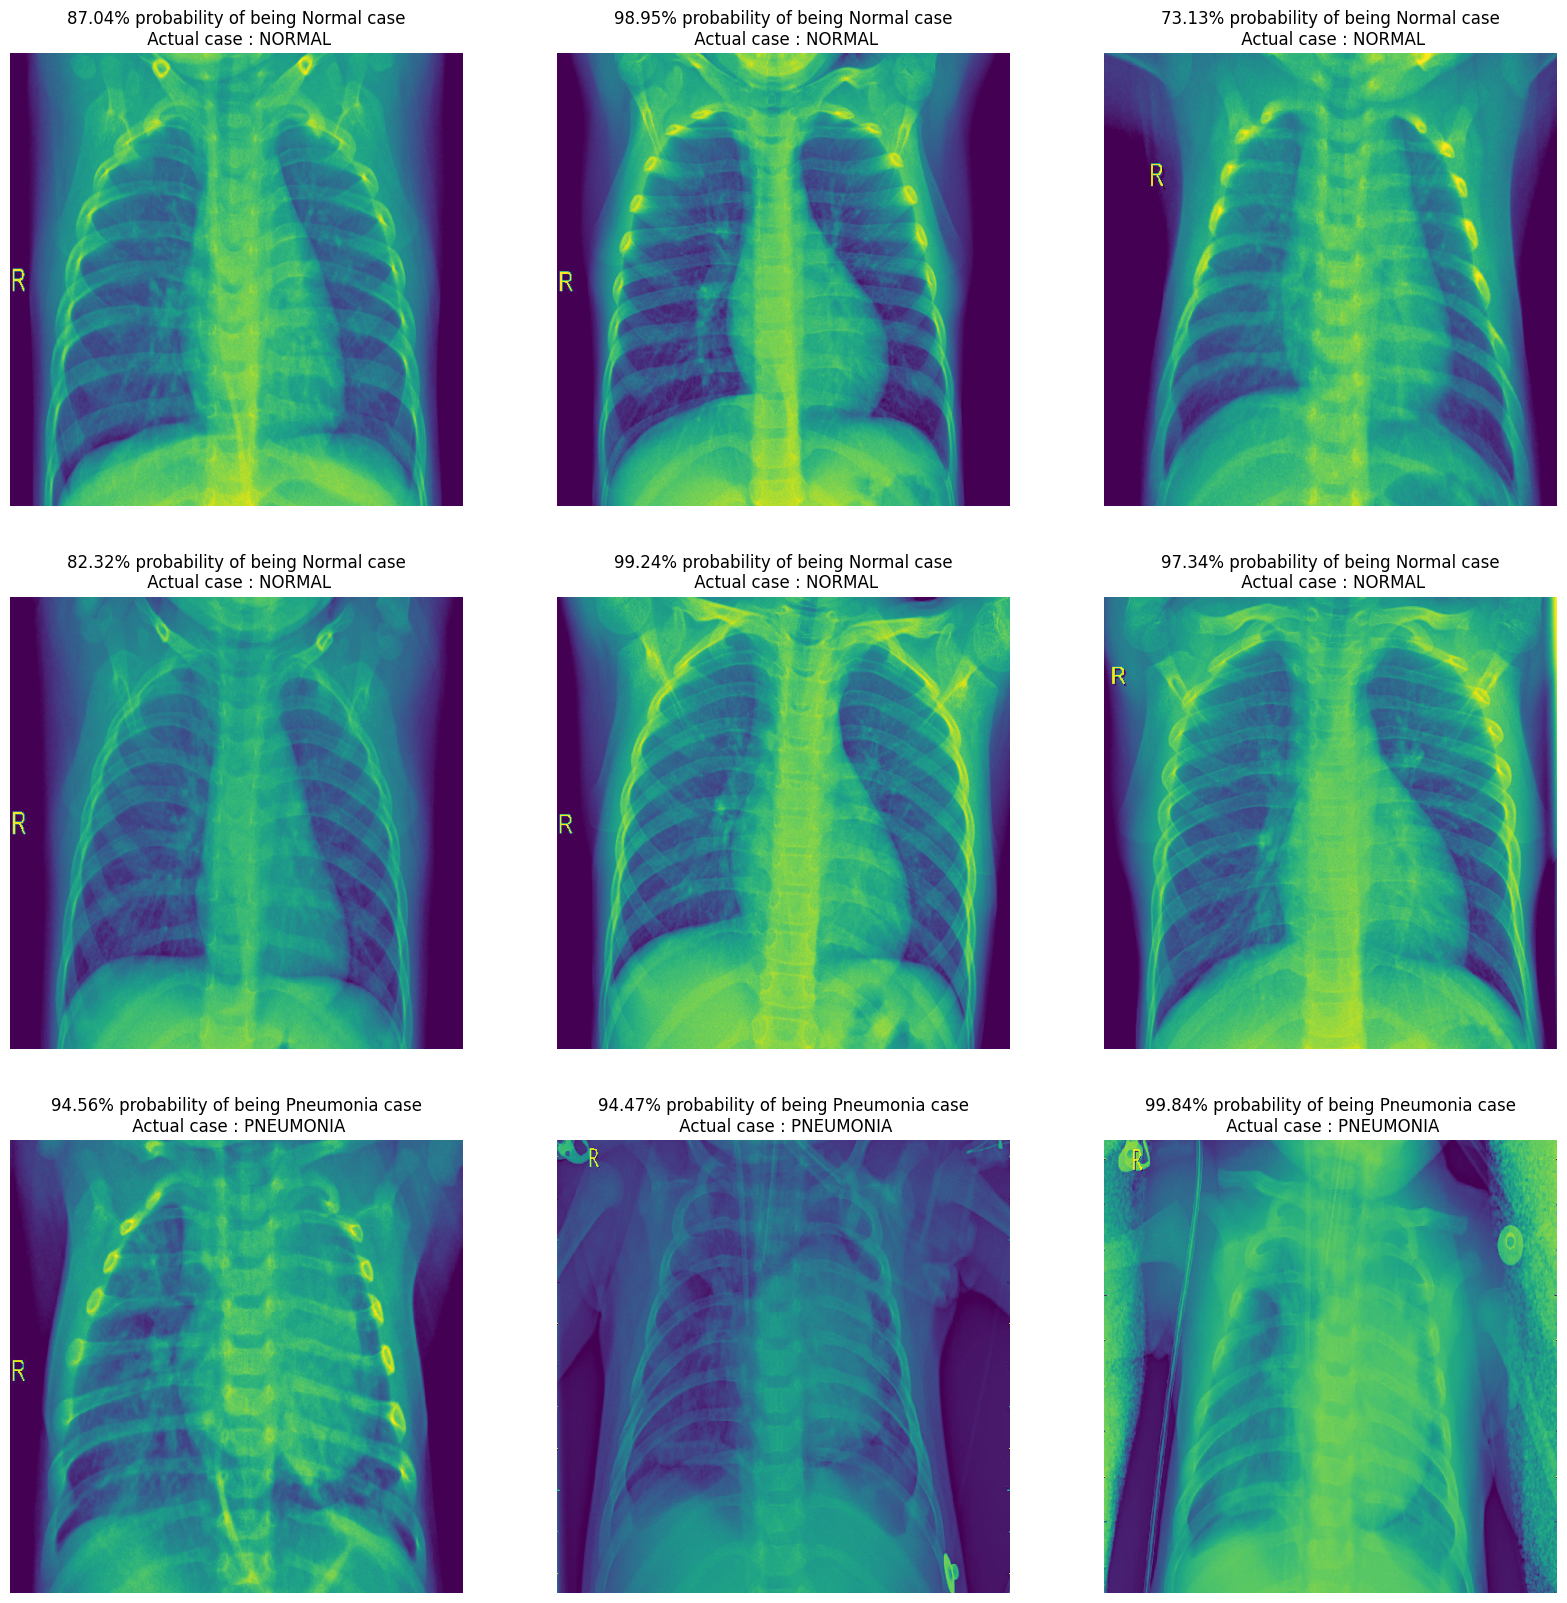

In [235]:
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
      
      

  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [236]:
tf.keras.models.save_model(cnn, 'pneumonia.h5',save_format='h5')

In [237]:
tf.saved_model.save(cnn, 'pneumonia')

INFO:tensorflow:Assets written to: pneumonia/assets


INFO:tensorflow:Assets written to: pneumonia/assets


In [2]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('pneumonia')
tflite_model = converter.convert()

with open('pneumonia.tflite', 'wb') as f:
  f.write(tflite_model)

2023-04-26 22:20:10.438691: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 22:20:10.501981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 22:20:11.011735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-26 22:20:11.754152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.